In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pickle


import os
#Loading LSTM model
model = tf.keras.models.load_model("/content/drive/Shareddrives/1:1_Krishna_Vijay/Results/Models/best_model_MSFT_LSTM.h5")
print("Model loaded.")

Model loaded.


In [3]:
model_GRU=tf.keras.models.load_model("/content/drive/Shareddrives/1:1_Krishna_Vijay/Results/Models/best_model_MSFT_GRU.h5")
print("Model GRU loaded.")

Model GRU loaded.


In [4]:
df = pd.read_csv("/content/drive/Shareddrives/1:1_Krishna_Vijay/Dataset/scaledNsplitted/MSFT_after_date_conversion.csv")

In [5]:
train_data= pd.read_csv('/content/drive/Shareddrives/1:1_Krishna_Vijay/Dataset/scaledNsplitted/MSFT_train_scaled.csv')
test_data=pd.read_csv('/content/drive/Shareddrives/1:1_Krishna_Vijay/Dataset/scaledNsplitted/MSFT_test_scaled.csv')

In [6]:
import numpy as np

def prepare_seq(data,seq_len):    #eg seq=len = 50
    sequences,labels = [],[]
    #len of data is 1353 then 1353 - 50 is the range
    for i in range(len(data) - seq_len):
        #eg 0 to 50
        x_temp = data.iloc[i:i+seq_len].values
        #stores 50th value
        y_temp = data.iloc[i+seq_len].values

        sequences.append(x_temp)
        labels.append(y_temp)

    return np.array(sequences), np.array(labels)

In [7]:
# define the sequence length
SEQ_LENGTH = 50

# process the dataset
train_sequences,train_labels = prepare_seq(train_data, SEQ_LENGTH)
test_sequences,test_labels = prepare_seq(test_data, SEQ_LENGTH)
print(train_sequences.shape, test_sequences.shape)

(957, 50, 4) (202, 50, 4)


In [8]:
from sklearn.preprocessing import MinMaxScaler
import pickle
import os

#MODEL_SAVE_PATH = "/content/drive/MyDrive/Student data/krishna/Results/"

COLUMNS = list(df.columns)
print("Columns", COLUMNS)

# fit the model
scaler = MinMaxScaler().fit(df[COLUMNS])

# fot on data
df[COLUMNS] = scaler.transform(df[COLUMNS])

Columns ['open', 'high', 'low', 'close']


Make LSTM prediction

In [9]:
# make predictions
predictions = model.predict(test_sequences)
# inverse tranform the predictions
inverse_predictions = scaler.inverse_transform(predictions)

7/7 [==============================] - 1s 13ms/step


In [10]:
# create a dataframe frame using model predictions
PRED_COLUMNS = ['open_predicted','high_predicted','low_predicted','close_predicted']
# create the dataframe
pred_df = pd.concat([df.iloc[-predictions.shape[0]:], pd.DataFrame(inverse_predictions, columns = PRED_COLUMNS, index = df.iloc[-predictions.shape[0]:].index)], axis = 1)
pred_df[COLUMNS] = scaler.inverse_transform(pred_df[COLUMNS])
pred_df.head()

,open,high,low,close,open_predicted,high_predicted,low_predicted,close_predicted
1057,65.67,66.70,65.45,66.40,65.815979,66.171158,65.480476,65.824455
1058,67.48,67.66,67.10,67.53,66.015587,66.343544,65.692223,66.008904
1059,67.90,68.04,67.60,67.92,66.548668,66.815086,66.250870,66.508423
1060,68.08,68.31,67.62,67.83,67.194450,67.420898,66.899429,67.105202
1061,68.15,68.38,67.58,68.27,67.769730,67.999229,67.456154,67.638680


In [11]:
from sklearn.metrics import mean_squared_error

def evaluations(cols, dataframe = pred_df):
    for column in cols:
        print("{}".format(column))
        pred_col = column.lower() + "_predicted"
        mse = mean_squared_error(dataframe[column].values, dataframe[pred_col].values)
        print("Max and Min: {} and {}".format(dataframe[column].max(), dataframe[column].min()))
        print("MSE:", mse)
        print("RMSE:{}\n".format(np.sqrt(mse)))

        plt.figure(figsize = (10,6))
        plt.plot(dataframe[column], label = "actual")
        plt.plot(dataframe[pred_col], label = "predicted")
        plt.xlabel("Time")
        plt.ylabel(f"Actual and Predicted:{column}")
        plt.title(f"Actual and Predictions Comparison: {column}")
        plt.legend(loc="best")
        plt.grid(True)
        plt.show()
        print("\n\n")

open
Max and Min: 95.14 and 65.67
MSE: 1.5205184693305458
RMSE:1.2330930497454544



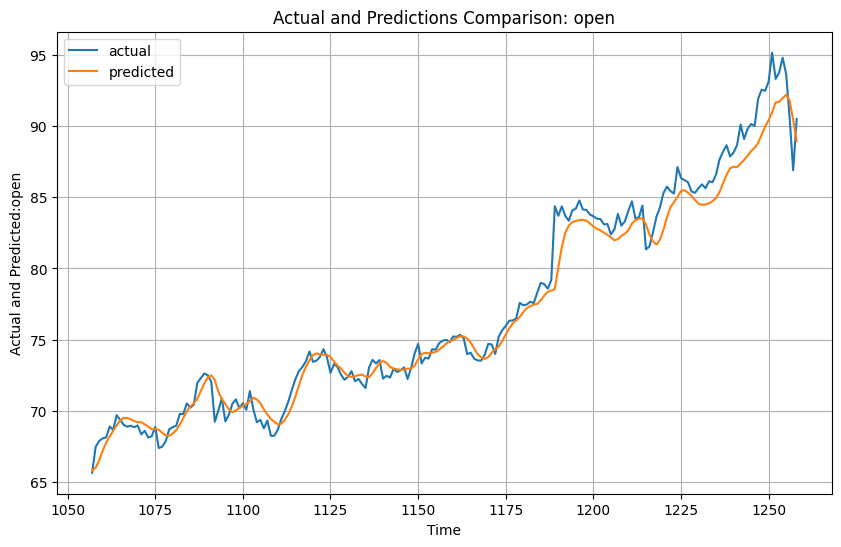




high
Max and Min: 96.07 and 66.7
MSE: 2.2898193894725263
RMSE:1.5132149184674748



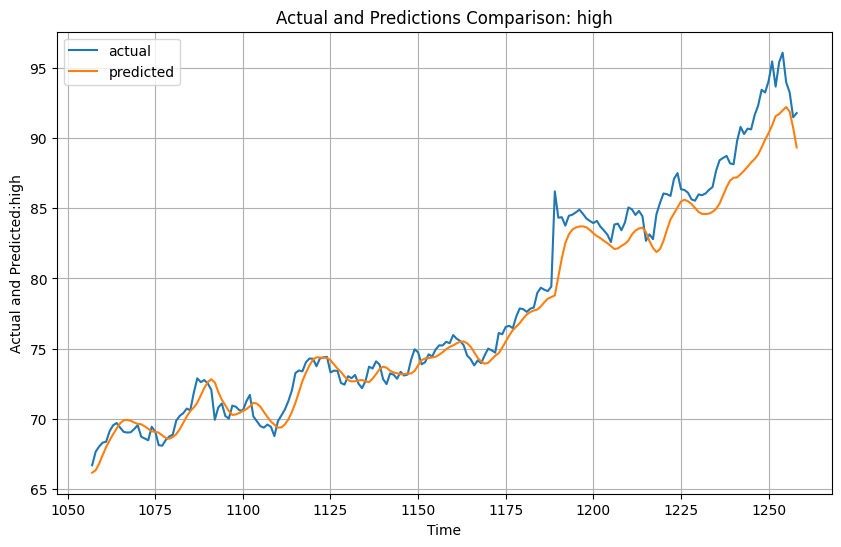




low
Max and Min: 93.72 and 65.45
MSE: 1.7276215631301586
RMSE:1.3143901867901169



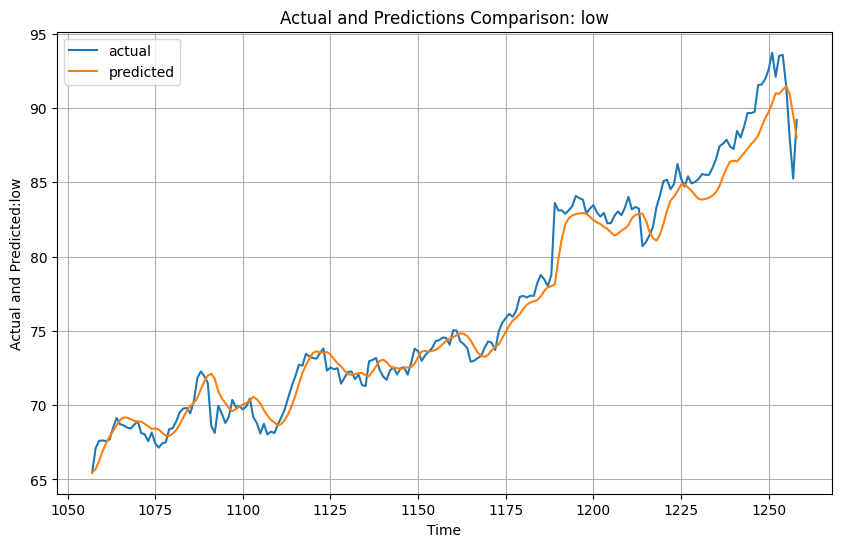




close
Max and Min: 95.00999999999999 and 66.4
MSE: 1.910828162335207
RMSE:1.3823270822548501



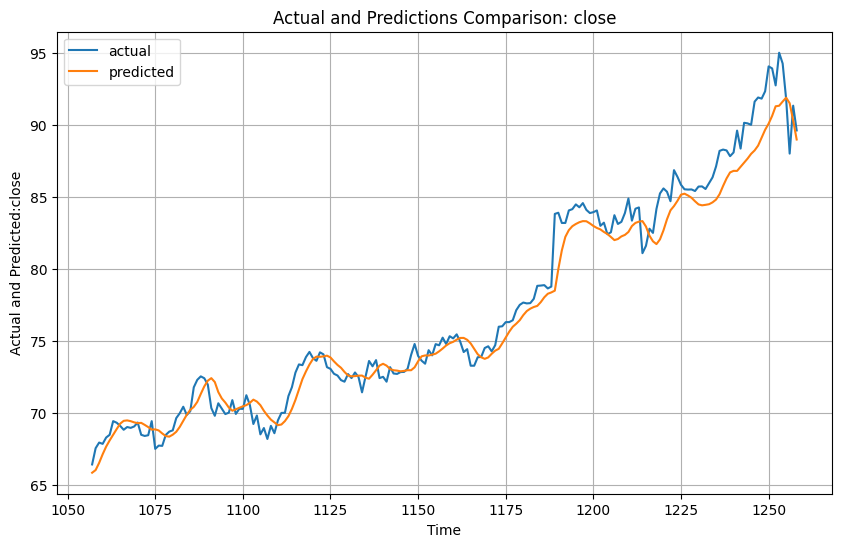

In [12]:
# make evaluations
evaluations(COLUMNS)

Make GRU prediction

In [13]:
# make predictions
predictions = model_GRU.predict(test_sequences)
# inverse tranform the predictions
inverse_predictions = scaler.inverse_transform(predictions)

7/7 [==============================] - 1s 24ms/step


In [14]:
# create a dataframe frame using model predictions
PRED_COLUMNS = ['open_predicted','high_predicted','low_predicted','close_predicted']
# create the dataframe
pred_df = pd.concat([df.iloc[-predictions.shape[0]:], pd.DataFrame(inverse_predictions, columns = PRED_COLUMNS, index = df.iloc[-predictions.shape[0]:].index)], axis = 1)
pred_df[COLUMNS] = scaler.inverse_transform(pred_df[COLUMNS])
pred_df.head()

,open,high,low,close,open_predicted,high_predicted,low_predicted,close_predicted
1057,65.67,66.70,65.45,66.40,65.957596,66.958519,65.984680,66.338432
1058,67.48,67.66,67.10,67.53,66.289955,67.333969,66.379128,66.709290
1059,67.90,68.04,67.60,67.92,67.199944,68.336876,67.401176,67.722664
1060,68.08,68.31,67.62,67.83,67.781410,68.911919,67.942543,68.271202
1061,68.15,68.38,67.58,68.27,68.008392,69.109253,68.105301,68.452454


open
Max and Min: 95.14 and 65.67
MSE: 1.5205184693305458
RMSE:1.2330930497454544



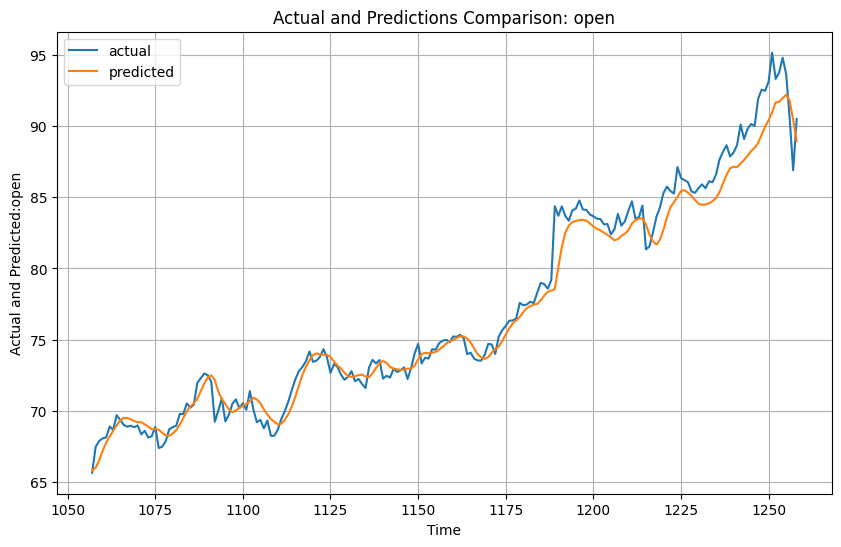




high
Max and Min: 96.07 and 66.7
MSE: 2.2898193894725263
RMSE:1.5132149184674748



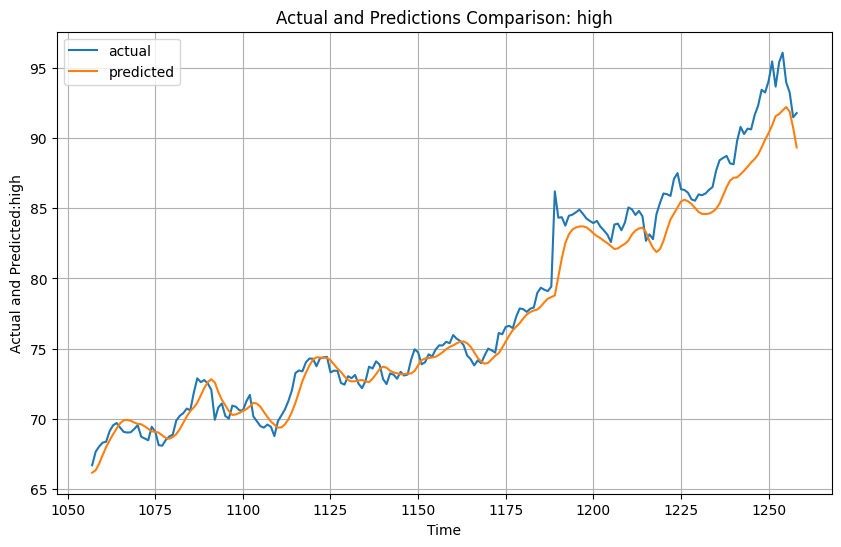




low
Max and Min: 93.72 and 65.45
MSE: 1.7276215631301586
RMSE:1.3143901867901169



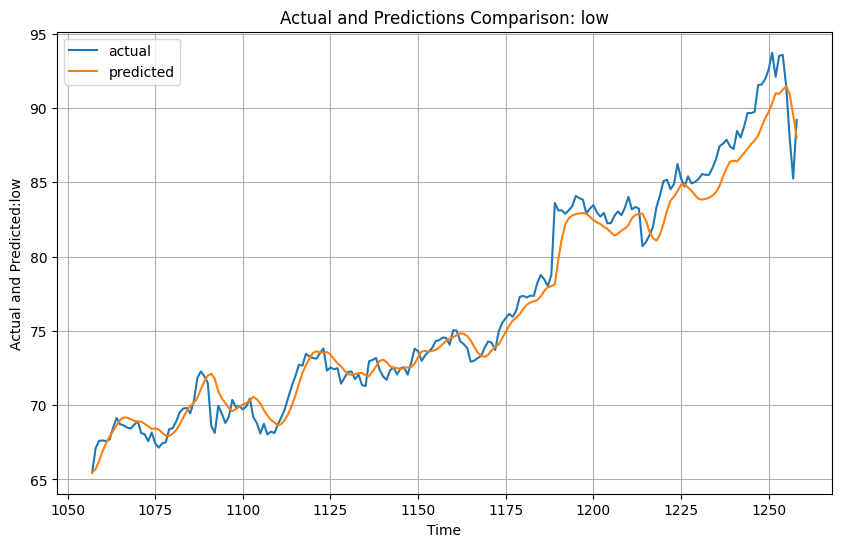




close
Max and Min: 95.00999999999999 and 66.4
MSE: 1.910828162335207
RMSE:1.3823270822548501



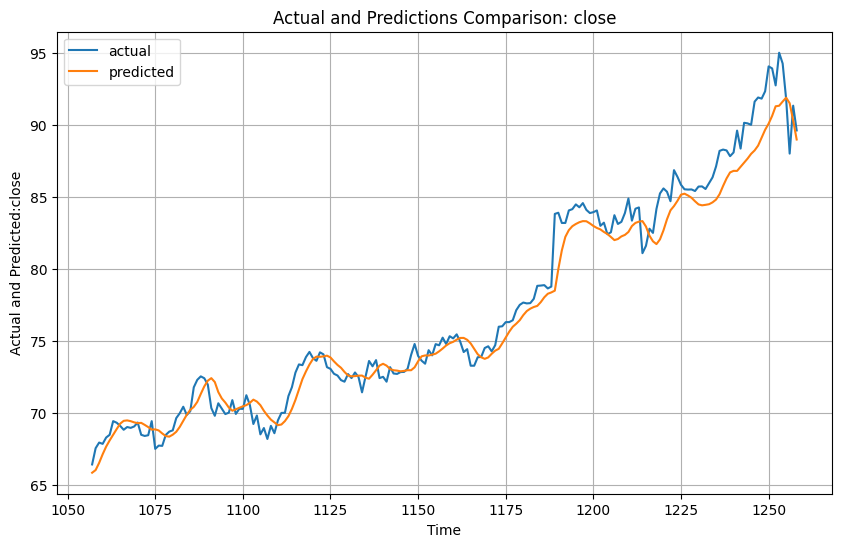

In [15]:
# make evaluations
evaluations(COLUMNS)